In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
from rei.cognitive.messages.tensor_fragment import FragmentTensor
from test.common.basic_graph_creation_functions import create_fano_graph, setup_test_graph_elements, create_multitree, create_simple_tree

# Simple tree
The folllowing example is a simple tree of two edges.

In [91]:
taxon, simple_tree_graph = create_simple_tree()
fragment = setup_test_graph_elements(taxon, simple_tree_graph)

In [92]:
fragment.V

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[1., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 1.],
        [0., 0.],
        [0., 0.]]])

In [93]:
fragment.I

array([[-1., -1.],
       [ 1.,  0.],
       [ 0.,  1.]])

In [94]:
np.tensordot(fragment.V.T, np.abs(fragment.I.T), axes=([1,0],[1,0]))

array([0., 1., 1.])

In [95]:
print(fragment.V.shape, fragment.I.shape)

(3, 3, 2) (3, 2)


In [97]:
D_m = np.sum(fragment.V.T, 1)
d = np.apply_along_axis(np.diag, 1, D_m)
L_m = d - fragment.V.T

In [98]:
inv_L = np.sum(L_m, axis=0)/np.sum(D_m)
e,w = np.linalg.eig(inv_L)
rowvise = np.sum(D_m, axis=0)
x = D_m*(1.0/rowvise)
x[x <= 0] = 1.0
entropy = -x*np.log2(x)
print(np.sum(entropy))

nan


C:\Users\keret\AppData\Local\Temp\ipykernel_10324\1422686602.py:4: RuntimeWarning: divide by zero encountered in divide
  x = D_m*(1.0/rowvise)
C:\Users\keret\AppData\Local\Temp\ipykernel_10324\1422686602.py:4: RuntimeWarning: invalid value encountered in multiply
  x = D_m*(1.0/rowvise)


# Fano graph creation

The Fano-graph is a very useful graph to test hypergraphs.

In [61]:
taxon, fano_graph = create_fano_graph()
fragment = setup_test_graph_elements(taxon, fano_graph)

In [62]:
np.sum(fragment.V, axis=2)

array([[0., 1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 0.]])

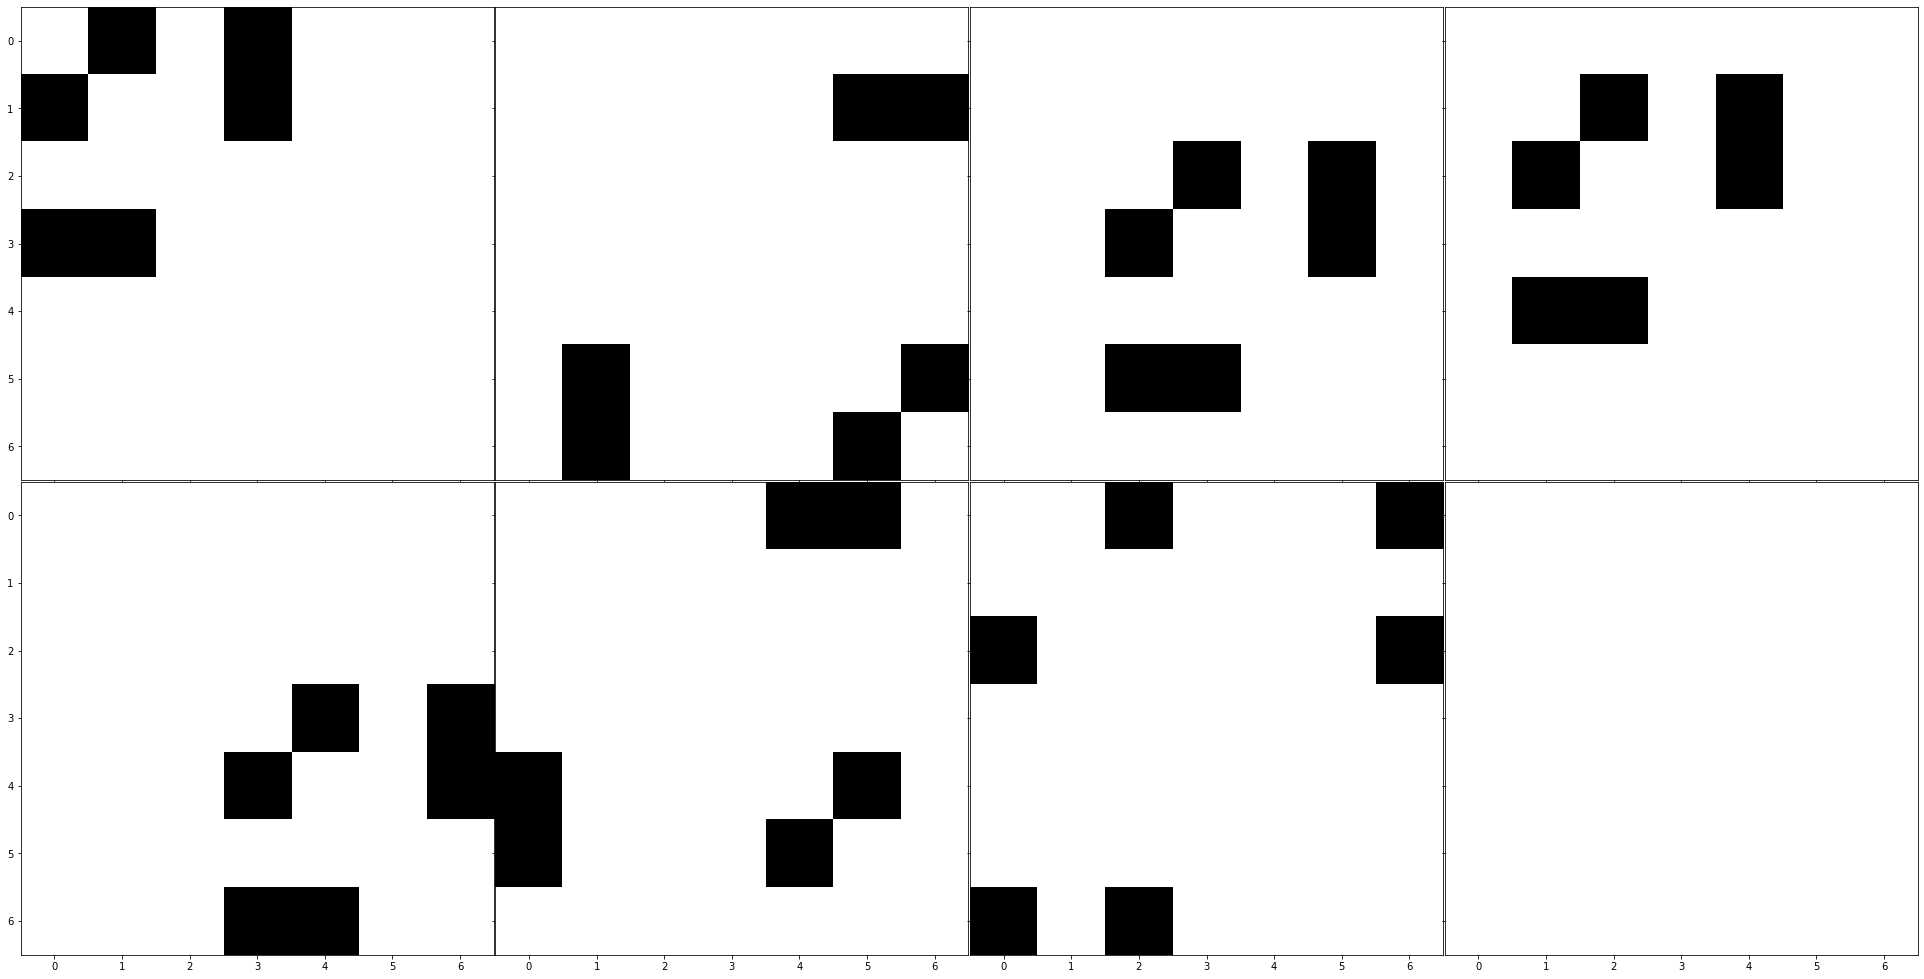

In [63]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(34,34))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 4))
for ax, im in zip(grid, fragment.V.T):
    ax.imshow(im, cmap=cm.binary)

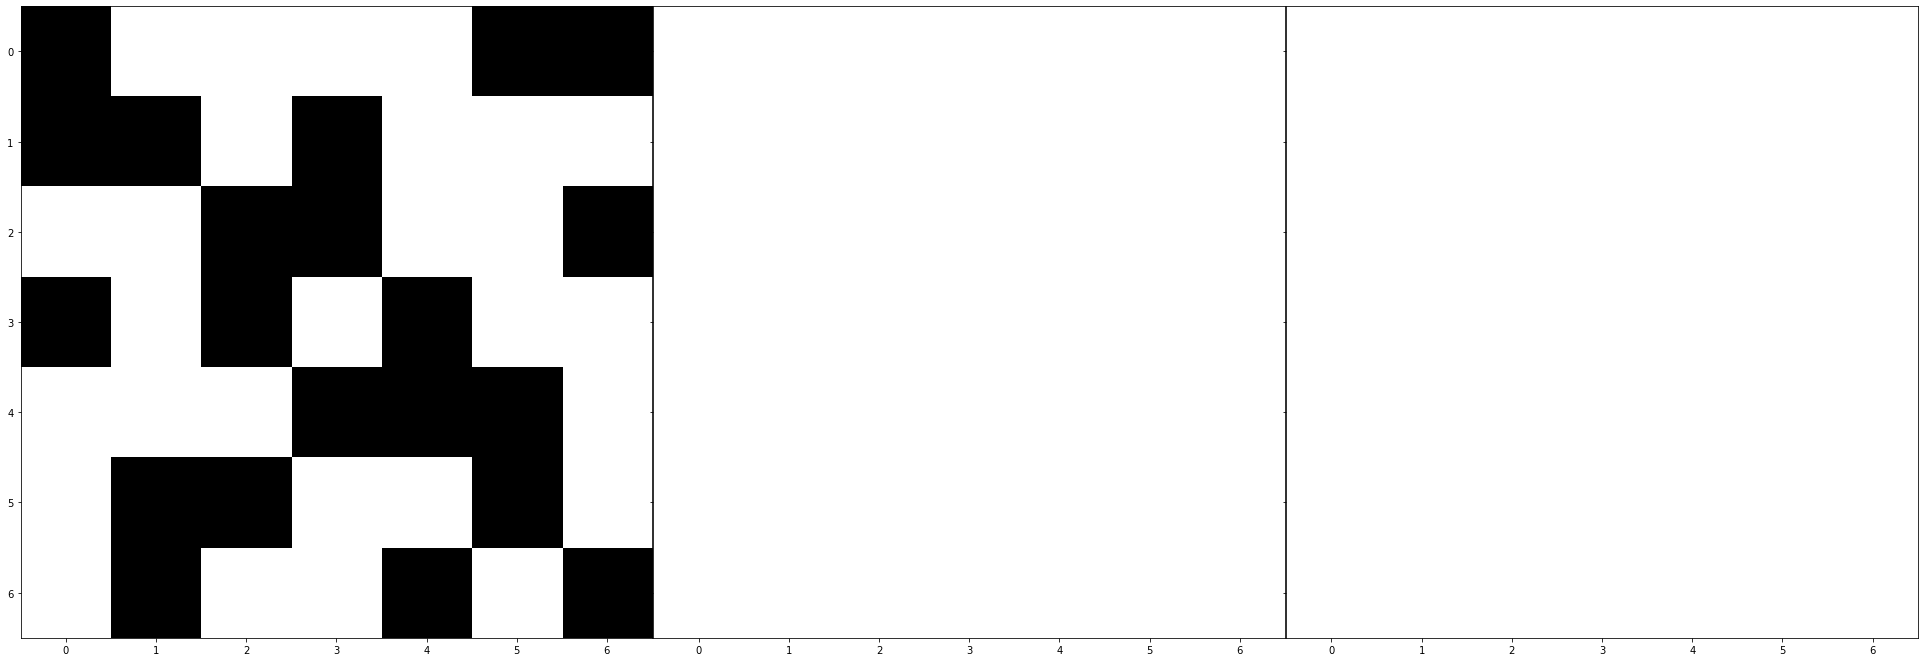

In [64]:
fig = plt.figure(figsize=(34,34))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 3))
for ax, im in zip(grid, [fragment.I, fragment.EH.T, fragment.Hi]):
    ax.imshow(im, cmap=cm.binary)

## Laplacian calculation

In [77]:
D_m = np.sum(fragment.V.T, 1)
d = np.apply_along_axis(np.diag, 1, D_m)
L_m = d - fragment.V.T

In [78]:
d

array([[[2., 0., 0., 0., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 2., 0.],
        [0., 0., 0., 0., 0., 0., 2.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 2., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0., 0.],
        [0., 0., 2., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 2., 0., 0.],
      

In [81]:
print(np.sum(L_m, axis=0))

[[ 6. -1. -1. -1. -1. -1. -1.]
 [-1.  6. -1. -1. -1. -1. -1.]
 [-1. -1.  6. -1. -1. -1. -1.]
 [-1. -1. -1.  6. -1. -1. -1.]
 [-1. -1. -1. -1.  6. -1. -1.]
 [-1. -1. -1. -1. -1.  6. -1.]
 [-1. -1. -1. -1. -1. -1.  6.]]


In [90]:
inv_L = np.sum(L_m, axis=0)/np.sum(D_m)
e,w = np.linalg.eig(inv_L)
rowvise = np.sum(D_m, axis=0)
x = D_m*(1.0/rowvise)
x[x <= 0] = 1.0
entropy = -x*np.log2(x)
print(np.sum(entropy))

11.094737505048094


# Calculating the degree matrix

The degree matrix can be calculated as a simple tensor operation:

In [50]:
np.tensordot(fragment.V.T, fragment.I.T, axes=([1,0],[1,0]))

array([6., 6., 6., 6., 6., 6., 6.])

In [53]:
D_m = np.sum(fragment.V.T, 1)
print(D_m)

[[2. 2. 0. 2. 0. 0. 0.]
 [0. 2. 0. 0. 0. 2. 2.]
 [0. 0. 2. 2. 0. 2. 0.]
 [0. 2. 2. 0. 2. 0. 0.]
 [0. 0. 0. 2. 2. 0. 2.]
 [2. 0. 0. 0. 2. 2. 0.]
 [2. 0. 2. 0. 0. 0. 2.]]


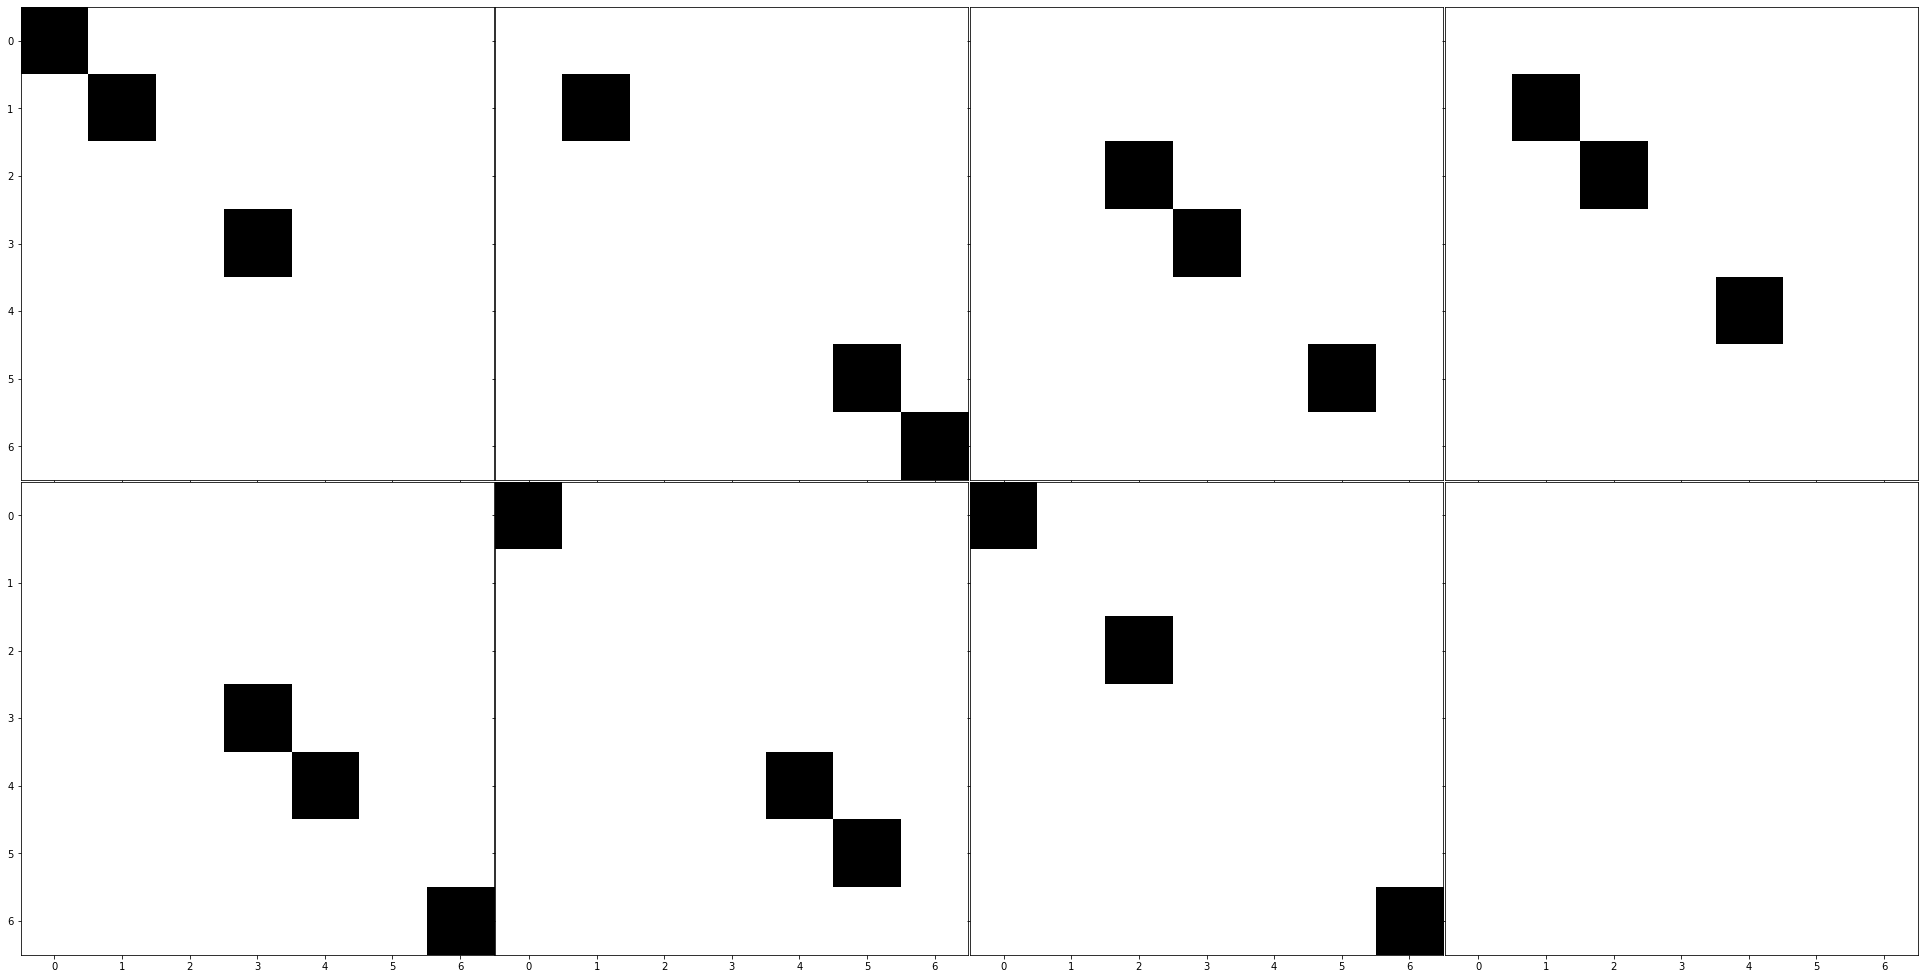

In [54]:
d = np.apply_along_axis(np.diag, 1, D_m)
fig = plt.figure(figsize=(34,34))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 4))
for ax, im in zip(grid, d):
    ax.imshow(im, cmap=cm.binary)

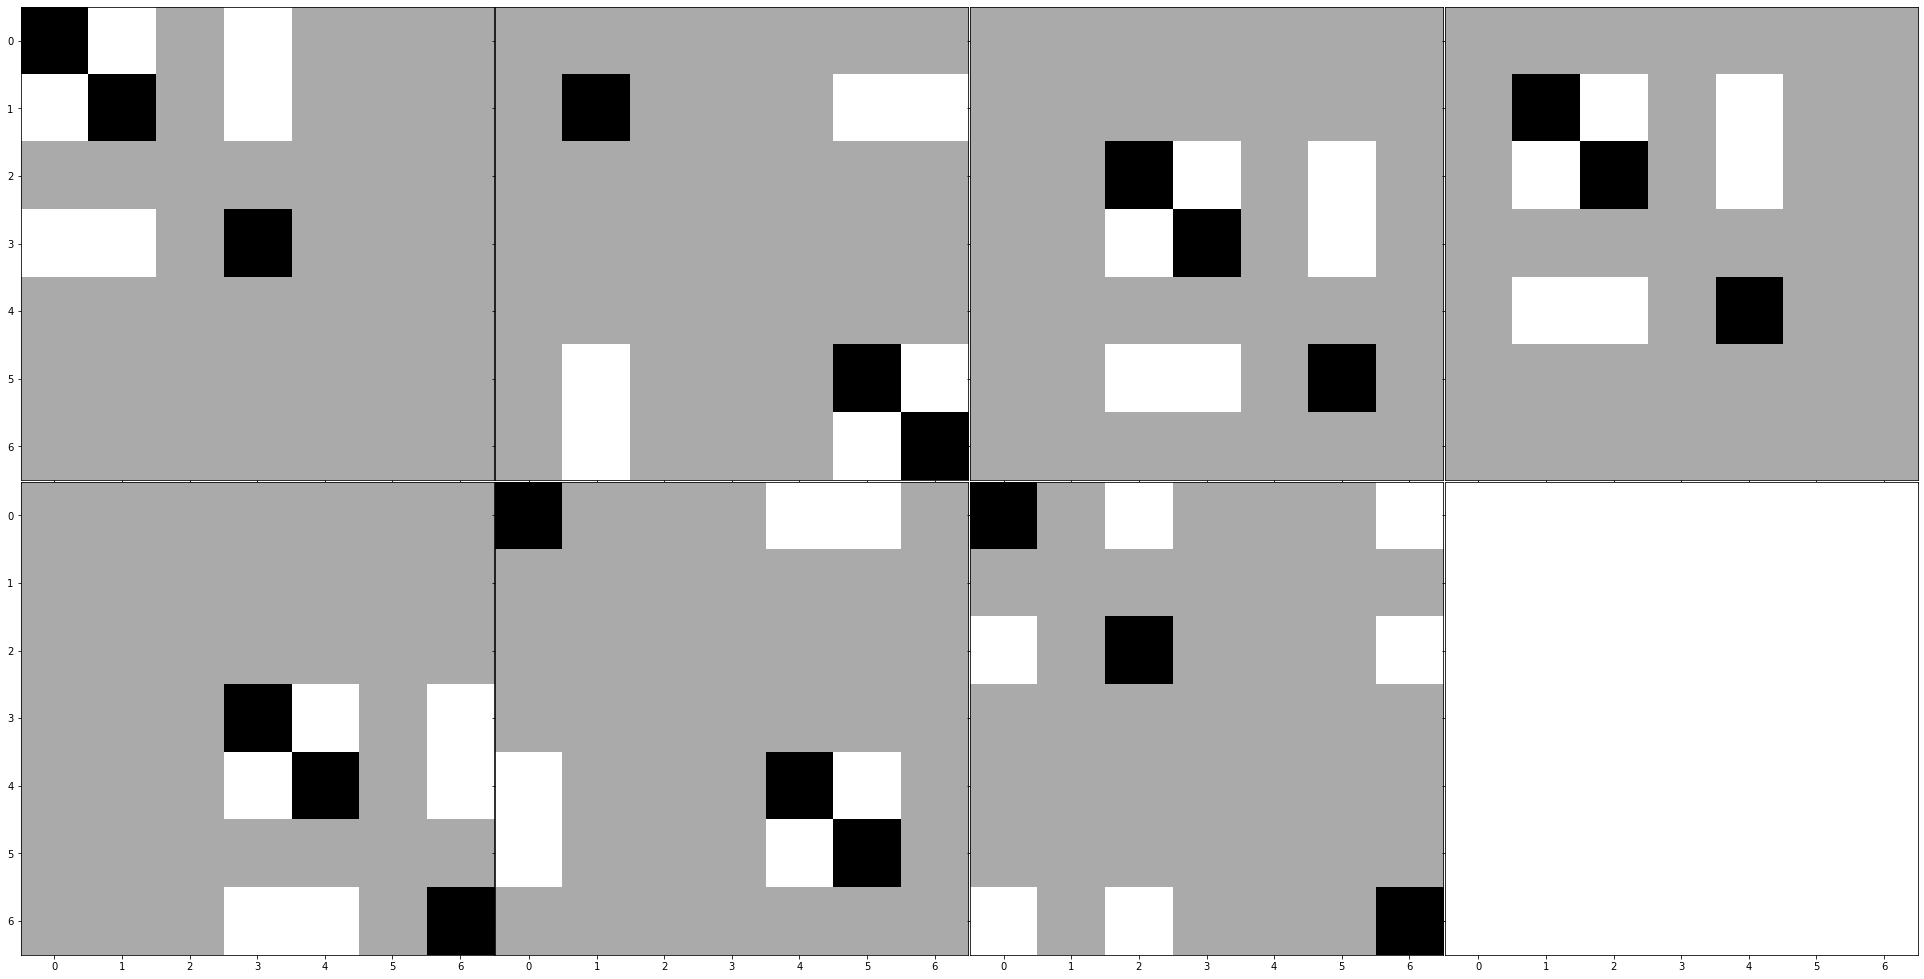

In [45]:
L_m = d - fragment.V.T
fig = plt.figure(figsize=(34,34))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 4))
for ax, im in zip(grid, L_m):
    ax.imshow(im, cmap=cm.binary)

In [46]:
deg = np.sum(np.abs(D_m))
print(deg)

42.0


# Calculating the adjacency matrix

The adjacecny matrix can be calculated as the following tensor product:

In [19]:
np.tensordot(fragment.V.T, fragment.I.T, axes=([1,0],[1,0]))

array([6., 6., 6., 6., 6., 6., 6.])

# Multi tree example

In [14]:
taxon, graph = create_multitree()
fragment_tree = setup_test_graph_elements(taxon, graph)

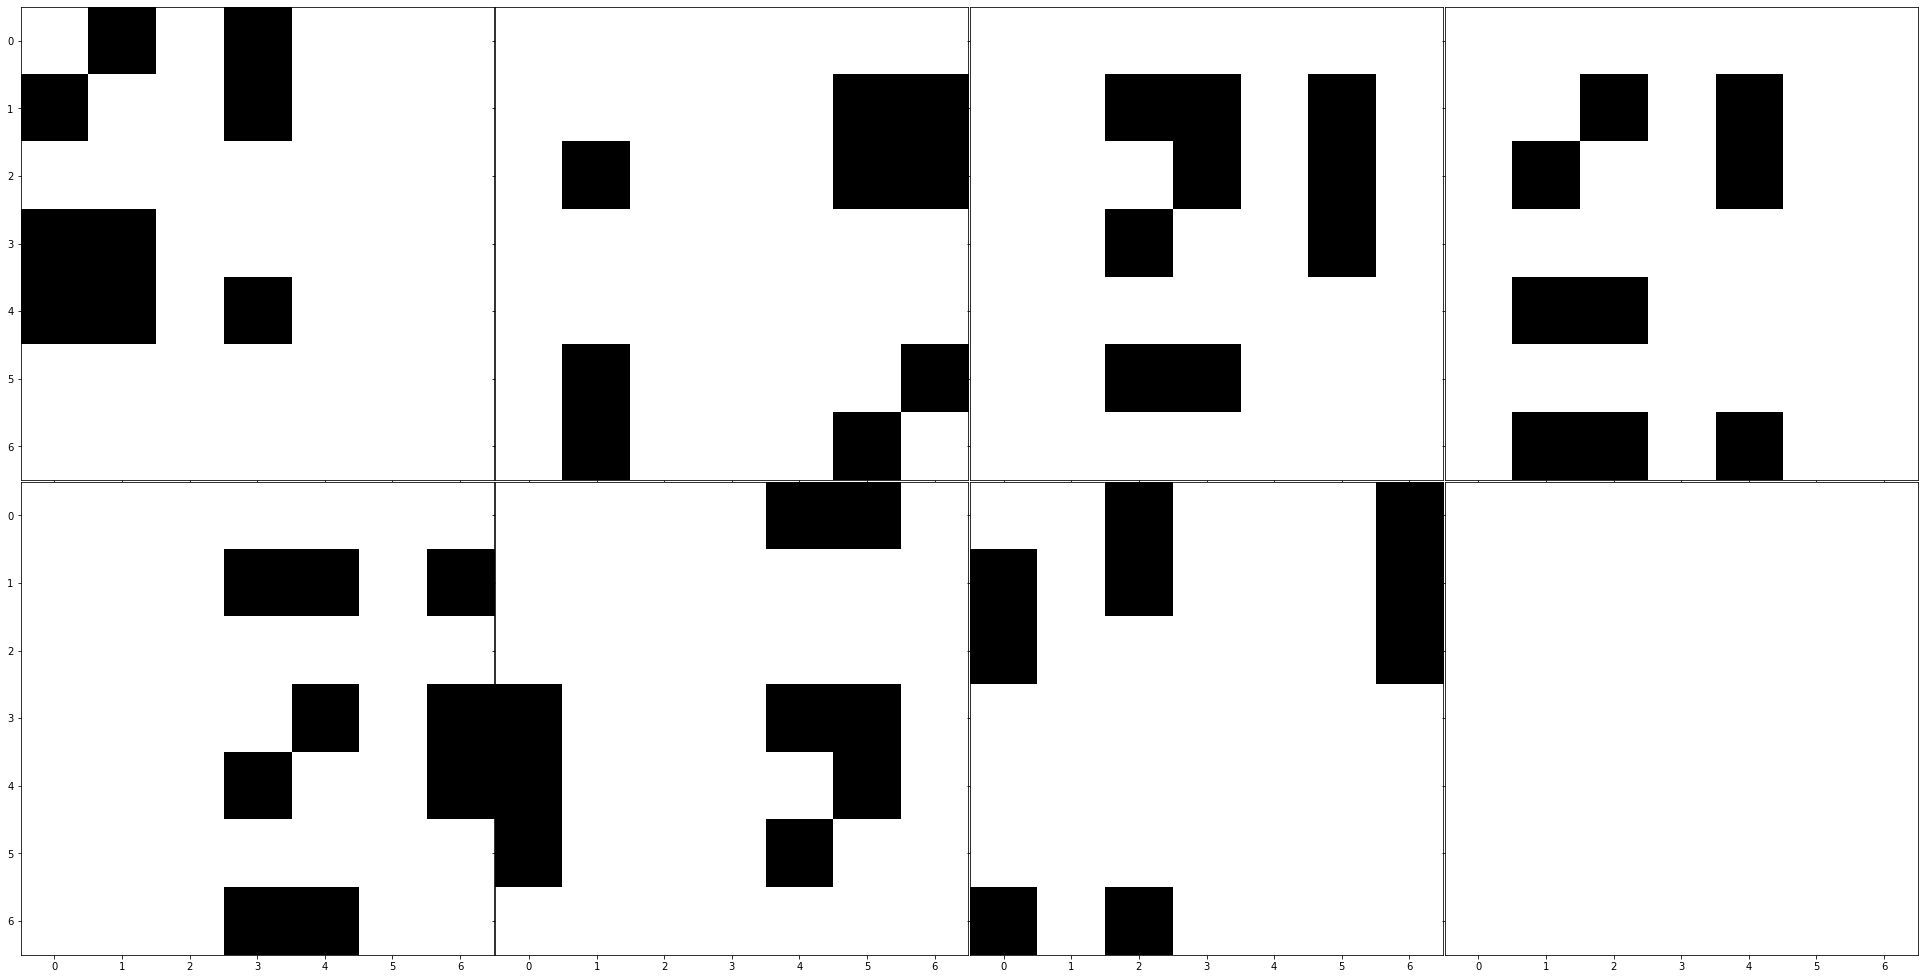

In [17]:
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(34,34))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 4))
for ax, im in zip(grid, fragment_tree.V.T):
    ax.imshow(im, cmap=cm.binary)